In [1]:
print("Jai shree ram")

Jai shree ram


# Linear Regression 

In [2]:
# Let's import the required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# let's import the dataset
df=pd.read_csv("Salary Data.csv")

In [4]:
# let's perform some EDA(explonatry Data Analysis)
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
# check null value 
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
# number of columns 
df.shape[0]

375

In [8]:
# number of row
df.shape[1]

6

In [9]:
# datatype of columns
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [10]:
# type of dataset
type(df.shape)

tuple

In [11]:
# 2 null value avilable in it lets check this null vlue in percentage
df.isnull().sum()/df.shape[0]*100

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

In [12]:
# let's drop null value from the dataset
df.dropna(inplace=True)

In [13]:
# Now let's check once is there any null value exist now
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [19]:
# check duplicated 
df.duplicated().sum().sum()

np.int64(49)

#### So let's create the feature and Target for the data set.
#### Here we will create model that predict sallary based on the experience so experience is feature and sallary is traget

In [15]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [16]:
x=df[["Years of Experience"]]
y=df["Salary"]

In [20]:
# let's split the data
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

In [22]:
x_train.head()

,Years of Experience
213,8.0
102,19.0
333,4.0
189,1.5
124,16.0


In [24]:
y_train.head()

213     85000.0
102    150000.0
333     60000.0
189     35000.0
124    140000.0
Name: Salary, dtype: float64

In [27]:
# let's model selection 
from sklearn.linear_model import LinearRegression

In [28]:
# create object for the LinearRegression 
model=LinearRegression()

In [29]:
# let's fit  the model 
model.fit(x_train,y_train)

LinearRegression()

In [33]:
# let's perform the train and test prediction 
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [34]:
# Now let's evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
r2_score(y_train,train_predict)

0.8655881256766813

In [37]:
# check testing score
r2_score(y_test,test_predict)

0.8473709939344429

In [38]:
# mean absolute error
mean_absolute_error(y_train,train_predict)

12386.335735048238

In [42]:
mean_absolute_error(y_test,test_predict)

14435.732468045797

In [43]:
# let's do some standard scalling 
from sklearn.preprocessing import StandardScaler

In [44]:
# object for StandardScaler
obj=StandardScaler()

In [60]:
# now fit the data
x_new=obj.fit_transform(x)

In [61]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_new,y,test_size=0.1,random_state=10)

In [62]:
# create new object for LinearRegression 
obj1=LinearRegression()

In [64]:
obj1.fit(x_train1,y_train1)

LinearRegression()

In [65]:
train_pred=obj1.predict(x_train1)
test_pred=obj1.predict(x_test1)

In [66]:
# Again evaluate the model
r2_score(y_train1,train_pred)

0.8655881256766813

In [67]:
r2_score(y_test1,test_pred)

0.8473709939344429

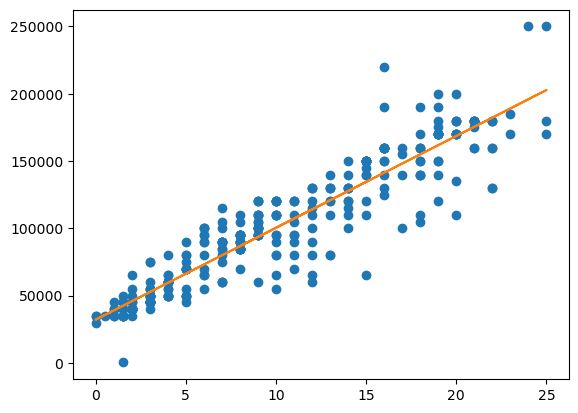

In [70]:
# let's draw best feet line
plt.plot(x_train,y_train,"o")
plt.plot(x_train,train_pred)